# Emissions Data



In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [24]:
# Source: https://ww3.arb.ca.gov/cc/inventory/pubs/ca_wildfire_co2_emissions_estimates.pdf
emissions_df = pd.DataFrame()

emissions_df['Year'] = list(range(2000, 2020))
emissions_df['CO2_emissions'] = [6.1, 6.7, 13.9, 19.2, 5.4, 2.1, 15.2, 22.8, 45.7,
                                9.6, 1.4, 3.5, 15.9, 19.2, 21.2, 22.9, 14.4, 36.7,
                                45.5, 6.5]
emissions_df['PM10_emissions'] = [87, 99, 188, 153, 57, 16, 176, 219, 675, 101, 
                                  15, 43, 226, 277, 333, 320, 195, 469, 598, 83]
emissions_df['PM25_emissions'] = [74, 84, 160, 129, 48, 13, 149, 186, 572, 86,
                                 13, 36, 191, 235, 282, 272, 166, 397, 507, 70]

emissions_df

,Year,CO2_emissions,PM10_emissions,PM25_emissions
0,2000,6.10,87,74
1,2001,6.70,99,84
2,2002,13.90,188,160
3,2003,19.20,153,129
4,2004,5.40,57,48
5,2005,2.10,16,13
6,2006,15.20,176,149
7,2007,22.80,219,186
8,2008,45.70,675,572
9,2009,9.60,101,86


In [25]:
y = emissions_df['CO2_emissions']
y_train, y_test = temporal_train_test_split(y, test_size=6)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

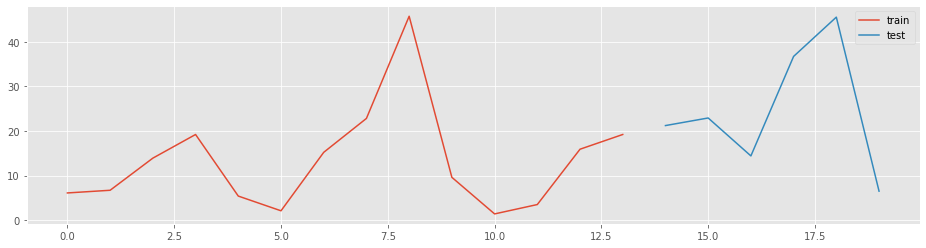

In [26]:
plot_ys(y_train, y_test, labels=['train', 'test'])

In [27]:
naive_model_season = NaiveForecaster(strategy='last', sp=10)
naive_model_season.fit(y_train)
y_preds_season = naive_model_season.predict(list(range(1, len(y_test)+1)))
mean_absolute_error(y_test, y_preds_season)

9.1

In [28]:
hw_model = AutoETS(auto=True, sp=5)
hw_model.fit(y_train.astype('float'))
y_preds_hw = hw_model.predict(list(range(1, len(y_test)+1)))
mean_absolute_error(y_test, y_preds_hw)

16.61314642443548

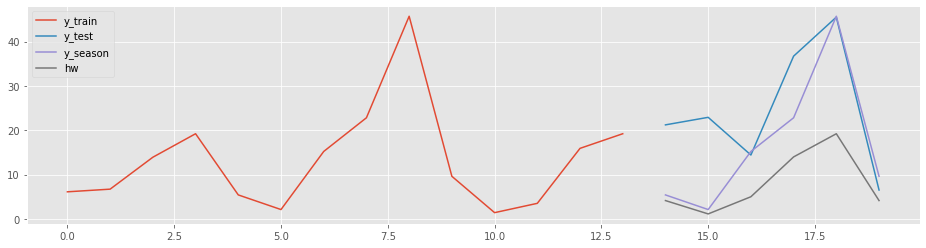

In [29]:
plot_ys(y_train, y_test, y_preds_season, y_preds_hw,
        labels=['y_train', 'y_test', 'y_season', 'hw']);

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

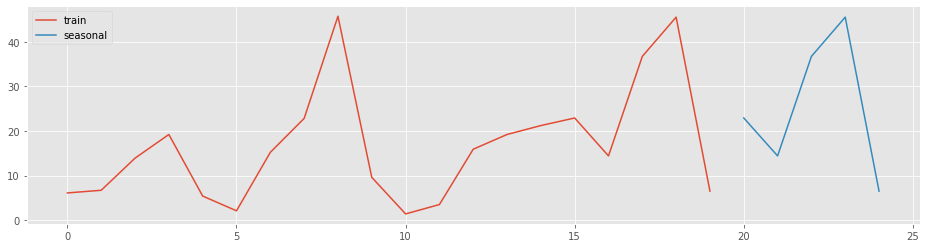

In [30]:
naive_model_season = NaiveForecaster(strategy='last', sp=5)
naive_model_season.fit(y)
y_preds_season_est = naive_model_season.predict(list(range(1, 6)))
plot_ys(y, y_preds_season_est, labels = ['train', 'seasonal'])